<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548


0:	learn: 0.9746845	total: 67.3ms	remaining: 1m 7s
1:	learn: 0.9533214	total: 70ms	remaining: 34.9s
2:	learn: 0.9307458	total: 72.3ms	remaining: 24s
3:	learn: 0.9142788	total: 74.6ms	remaining: 18.6s
4:	learn: 0.8958824	total: 76.9ms	remaining: 15.3s
5:	learn: 0.8790849	total: 79.5ms	remaining: 13.2s
6:	learn: 0.8619816	total: 81.8ms	remaining: 11.6s
7:	learn: 0.8464289	total: 84ms	remaining: 10.4s
8:	learn: 0.8305468	total: 86.3ms	remaining: 9.5s
9:	learn: 0.8138349	total: 88.7ms	remaining: 8.78s
10:	learn: 0.7996729	total: 91.3ms	remaining: 8.21s
11:	learn: 0.7857534	total: 93.7ms	remaining: 7.72s
12:	learn: 0.7715386	total: 96.1ms	remaining: 7.29s
13:	learn: 0.7575323	total: 99.3ms	remaining: 7s
14:	learn: 0.7444340	total: 102ms	remaining: 6.69s
15:	learn: 0.7316492	total: 105ms	remaining: 6.44s
16:	learn: 0.7192922	total: 107ms	remaining: 6.19s
17:	learn: 0.7064985	total: 110ms	remaining: 5.99s
18:	learn: 0.6952810	total: 113ms	remaining: 5.85s
19:	learn: 0.6828880	total: 117ms	rem

34:	learn: 0.5465279	total: 161ms	remaining: 4.45s
35:	learn: 0.5392888	total: 165ms	remaining: 4.42s
36:	learn: 0.5330831	total: 168ms	remaining: 4.38s
37:	learn: 0.5264360	total: 171ms	remaining: 4.32s
38:	learn: 0.5194649	total: 173ms	remaining: 4.27s
39:	learn: 0.5123849	total: 175ms	remaining: 4.21s
40:	learn: 0.5068576	total: 178ms	remaining: 4.16s
41:	learn: 0.4999056	total: 180ms	remaining: 4.12s
42:	learn: 0.4944956	total: 182ms	remaining: 4.05s
43:	learn: 0.4888832	total: 184ms	remaining: 3.99s
44:	learn: 0.4832134	total: 186ms	remaining: 3.94s
45:	learn: 0.4767545	total: 187ms	remaining: 3.89s
46:	learn: 0.4722917	total: 189ms	remaining: 3.84s
47:	learn: 0.4670076	total: 195ms	remaining: 3.86s
48:	learn: 0.4622534	total: 214ms	remaining: 4.15s
49:	learn: 0.4582422	total: 216ms	remaining: 4.11s
50:	learn: 0.4527944	total: 219ms	remaining: 4.07s
51:	learn: 0.4481910	total: 221ms	remaining: 4.03s
52:	learn: 0.4424537	total: 224ms	remaining: 4s
53:	learn: 0.4390779	total: 225ms	

55:	learn: 0.4314375	total: 230ms	remaining: 3.88s
56:	learn: 0.4282847	total: 233ms	remaining: 3.86s
57:	learn: 0.4236224	total: 236ms	remaining: 3.83s
58:	learn: 0.4201155	total: 241ms	remaining: 3.84s
59:	learn: 0.4169958	total: 243ms	remaining: 3.81s
60:	learn: 0.4127958	total: 252ms	remaining: 3.88s
61:	learn: 0.4085546	total: 255ms	remaining: 3.85s
62:	learn: 0.4054622	total: 258ms	remaining: 3.84s
63:	learn: 0.4018495	total: 261ms	remaining: 3.81s
64:	learn: 0.3980962	total: 263ms	remaining: 3.78s
65:	learn: 0.3948088	total: 266ms	remaining: 3.76s
66:	learn: 0.3914925	total: 268ms	remaining: 3.74s
67:	learn: 0.3887142	total: 271ms	remaining: 3.71s
68:	learn: 0.3853658	total: 274ms	remaining: 3.7s
69:	learn: 0.3825927	total: 276ms	remaining: 3.67s
70:	learn: 0.3796055	total: 279ms	remaining: 3.66s
71:	learn: 0.3763733	total: 282ms	remaining: 3.63s
72:	learn: 0.3736204	total: 284ms	remaining: 3.6s
73:	learn: 0.3705399	total: 286ms	remaining: 3.58s
74:	learn: 0.3683030	total: 289ms

82:	learn: 0.3464501	total: 327ms	remaining: 3.61s
83:	learn: 0.3438715	total: 330ms	remaining: 3.59s
84:	learn: 0.3414538	total: 332ms	remaining: 3.57s
85:	learn: 0.3393139	total: 335ms	remaining: 3.56s
86:	learn: 0.3370826	total: 338ms	remaining: 3.54s
87:	learn: 0.3345264	total: 340ms	remaining: 3.53s
88:	learn: 0.3323088	total: 343ms	remaining: 3.51s
89:	learn: 0.3300298	total: 345ms	remaining: 3.49s
90:	learn: 0.3276988	total: 348ms	remaining: 3.48s
91:	learn: 0.3258439	total: 350ms	remaining: 3.46s
92:	learn: 0.3243862	total: 353ms	remaining: 3.44s
93:	learn: 0.3224038	total: 355ms	remaining: 3.42s
94:	learn: 0.3202467	total: 358ms	remaining: 3.41s
95:	learn: 0.3191194	total: 362ms	remaining: 3.41s
96:	learn: 0.3174508	total: 367ms	remaining: 3.41s


97:	learn: 0.3161382	total: 403ms	remaining: 3.71s
98:	learn: 0.3142913	total: 406ms	remaining: 3.7s
99:	learn: 0.3126198	total: 409ms	remaining: 3.68s
100:	learn: 0.3108707	total: 412ms	remaining: 3.66s
101:	learn: 0.3091747	total: 414ms	remaining: 3.65s
102:	learn: 0.3077261	total: 417ms	remaining: 3.63s
103:	learn: 0.3060790	total: 419ms	remaining: 3.61s
104:	learn: 0.3044257	total: 422ms	remaining: 3.59s
105:	learn: 0.3028329	total: 424ms	remaining: 3.57s
106:	learn: 0.3011633	total: 427ms	remaining: 3.56s
107:	learn: 0.2999964	total: 429ms	remaining: 3.54s
108:	learn: 0.2984117	total: 431ms	remaining: 3.52s
109:	learn: 0.2970373	total: 434ms	remaining: 3.51s
110:	learn: 0.2955180	total: 437ms	remaining: 3.5s
111:	learn: 0.2944303	total: 439ms	remaining: 3.48s
112:	learn: 0.2929282	total: 441ms	remaining: 3.46s
113:	learn: 0.2919593	total: 444ms	remaining: 3.45s
114:	learn: 0.2908659	total: 446ms	remaining: 3.44s
115:	learn: 0.2895208	total: 449ms	remaining: 3.42s
116:	learn: 0.288

129:	learn: 0.2725449	total: 496ms	remaining: 3.32s
130:	learn: 0.2715209	total: 499ms	remaining: 3.31s
131:	learn: 0.2704560	total: 502ms	remaining: 3.3s
132:	learn: 0.2692251	total: 504ms	remaining: 3.29s
133:	learn: 0.2681267	total: 507ms	remaining: 3.28s
134:	learn: 0.2673971	total: 509ms	remaining: 3.26s
135:	learn: 0.2667169	total: 512ms	remaining: 3.25s
136:	learn: 0.2654166	total: 514ms	remaining: 3.24s
137:	learn: 0.2646780	total: 516ms	remaining: 3.23s
138:	learn: 0.2636140	total: 520ms	remaining: 3.22s
139:	learn: 0.2623458	total: 522ms	remaining: 3.21s
140:	learn: 0.2613646	total: 526ms	remaining: 3.2s
141:	learn: 0.2604508	total: 528ms	remaining: 3.19s
142:	learn: 0.2593360	total: 532ms	remaining: 3.19s
143:	learn: 0.2584059	total: 535ms	remaining: 3.18s
144:	learn: 0.2573652	total: 537ms	remaining: 3.17s
145:	learn: 0.2562003	total: 540ms	remaining: 3.16s
146:	learn: 0.2552691	total: 542ms	remaining: 3.15s
147:	learn: 0.2544563	total: 545ms	remaining: 3.14s
148:	learn: 0.

154:	learn: 0.2495080	total: 581ms	remaining: 3.17s
155:	learn: 0.2486114	total: 586ms	remaining: 3.17s
156:	learn: 0.2477179	total: 590ms	remaining: 3.17s
157:	learn: 0.2464765	total: 592ms	remaining: 3.15s
158:	learn: 0.2457360	total: 595ms	remaining: 3.15s
159:	learn: 0.2447604	total: 597ms	remaining: 3.14s
160:	learn: 0.2440877	total: 600ms	remaining: 3.13s
161:	learn: 0.2432011	total: 602ms	remaining: 3.11s
162:	learn: 0.2426682	total: 605ms	remaining: 3.1s
163:	learn: 0.2416652	total: 615ms	remaining: 3.14s
164:	learn: 0.2411100	total: 630ms	remaining: 3.19s
165:	learn: 0.2404471	total: 635ms	remaining: 3.19s
166:	learn: 0.2398887	total: 637ms	remaining: 3.18s
167:	learn: 0.2391877	total: 640ms	remaining: 3.17s
168:	learn: 0.2385472	total: 642ms	remaining: 3.16s
169:	learn: 0.2378834	total: 646ms	remaining: 3.15s


170:	learn: 0.2372042	total: 724ms	remaining: 3.51s
171:	learn: 0.2361115	total: 729ms	remaining: 3.51s
172:	learn: 0.2352789	total: 733ms	remaining: 3.5s


173:	learn: 0.2344430	total: 750ms	remaining: 3.56s
174:	learn: 0.2336236	total: 753ms	remaining: 3.55s
175:	learn: 0.2331391	total: 755ms	remaining: 3.53s
176:	learn: 0.2326161	total: 757ms	remaining: 3.52s
177:	learn: 0.2316822	total: 760ms	remaining: 3.51s
178:	learn: 0.2310860	total: 763ms	remaining: 3.5s
179:	learn: 0.2304340	total: 767ms	remaining: 3.49s
180:	learn: 0.2293678	total: 773ms	remaining: 3.5s
181:	learn: 0.2285258	total: 779ms	remaining: 3.5s
182:	learn: 0.2279445	total: 781ms	remaining: 3.49s
183:	learn: 0.2274390	total: 784ms	remaining: 3.48s
184:	learn: 0.2269494	total: 786ms	remaining: 3.46s
185:	learn: 0.2261992	total: 789ms	remaining: 3.45s
186:	learn: 0.2256283	total: 791ms	remaining: 3.44s
187:	learn: 0.2251683	total: 794ms	remaining: 3.43s
188:	learn: 0.2243701	total: 796ms	remaining: 3.42s
189:	learn: 0.2237270	total: 800ms	remaining: 3.41s
190:	learn: 0.2232335	total: 803ms	remaining: 3.4s
191:	learn: 0.2227306	total: 817ms	remaining: 3.44s
192:	learn: 0.22

206:	learn: 0.2138141	total: 893ms	remaining: 3.42s
207:	learn: 0.2131393	total: 898ms	remaining: 3.42s


208:	learn: 0.2126268	total: 900ms	remaining: 3.41s
209:	learn: 0.2122167	total: 903ms	remaining: 3.4s
210:	learn: 0.2116499	total: 909ms	remaining: 3.4s
211:	learn: 0.2112957	total: 911ms	remaining: 3.39s
212:	learn: 0.2108003	total: 914ms	remaining: 3.38s
213:	learn: 0.2103520	total: 917ms	remaining: 3.37s
214:	learn: 0.2098775	total: 919ms	remaining: 3.35s
215:	learn: 0.2094551	total: 922ms	remaining: 3.35s
216:	learn: 0.2090501	total: 924ms	remaining: 3.33s
217:	learn: 0.2086804	total: 927ms	remaining: 3.33s
218:	learn: 0.2079718	total: 930ms	remaining: 3.32s
219:	learn: 0.2073888	total: 932ms	remaining: 3.31s
220:	learn: 0.2070539	total: 935ms	remaining: 3.29s
221:	learn: 0.2065748	total: 941ms	remaining: 3.3s
222:	learn: 0.2063088	total: 961ms	remaining: 3.35s
223:	learn: 0.2059390	total: 963ms	remaining: 3.34s
224:	learn: 0.2054415	total: 966ms	remaining: 3.33s
225:	learn: 0.2048015	total: 968ms	remaining: 3.32s
226:	learn: 0.2044887	total: 971ms	remaining: 3.31s
227:	learn: 0.2

250:	learn: 0.1924921	total: 1.05s	remaining: 3.15s
251:	learn: 0.1921492	total: 1.06s	remaining: 3.14s
252:	learn: 0.1918537	total: 1.06s	remaining: 3.13s
253:	learn: 0.1916551	total: 1.06s	remaining: 3.12s


254:	learn: 0.1914959	total: 1.07s	remaining: 3.11s
255:	learn: 0.1913115	total: 1.07s	remaining: 3.12s
256:	learn: 0.1909020	total: 1.08s	remaining: 3.11s
257:	learn: 0.1904118	total: 1.08s	remaining: 3.1s
258:	learn: 0.1897152	total: 1.08s	remaining: 3.09s
259:	learn: 0.1892531	total: 1.08s	remaining: 3.09s
260:	learn: 0.1887220	total: 1.09s	remaining: 3.08s
261:	learn: 0.1881599	total: 1.09s	remaining: 3.07s
262:	learn: 0.1877612	total: 1.09s	remaining: 3.06s
263:	learn: 0.1874296	total: 1.09s	remaining: 3.05s
264:	learn: 0.1871585	total: 1.1s	remaining: 3.04s
265:	learn: 0.1866385	total: 1.1s	remaining: 3.04s
266:	learn: 0.1862062	total: 1.1s	remaining: 3.03s
267:	learn: 0.1858874	total: 1.1s	remaining: 3.02s
268:	learn: 0.1854860	total: 1.11s	remaining: 3.01s
269:	learn: 0.1850644	total: 1.11s	remaining: 3s
270:	learn: 0.1847570	total: 1.11s	remaining: 2.99s
271:	learn: 0.1844875	total: 1.11s	remaining: 2.98s
272:	learn: 0.1841279	total: 1.12s	remaining: 2.98s
273:	learn: 0.183326

313:	learn: 0.1662475	total: 1.23s	remaining: 2.69s
314:	learn: 0.1658777	total: 1.24s	remaining: 2.69s
315:	learn: 0.1655602	total: 1.24s	remaining: 2.68s
316:	learn: 0.1654527	total: 1.24s	remaining: 2.67s


317:	learn: 0.1650438	total: 1.24s	remaining: 2.66s
318:	learn: 0.1645169	total: 1.25s	remaining: 2.66s
319:	learn: 0.1643970	total: 1.25s	remaining: 2.65s
320:	learn: 0.1639113	total: 1.25s	remaining: 2.65s
321:	learn: 0.1637897	total: 1.25s	remaining: 2.64s
322:	learn: 0.1633758	total: 1.26s	remaining: 2.63s
323:	learn: 0.1632758	total: 1.26s	remaining: 2.63s
324:	learn: 0.1631652	total: 1.26s	remaining: 2.62s
325:	learn: 0.1627531	total: 1.26s	remaining: 2.61s
326:	learn: 0.1625728	total: 1.26s	remaining: 2.6s
327:	learn: 0.1621389	total: 1.27s	remaining: 2.6s
328:	learn: 0.1614826	total: 1.27s	remaining: 2.59s
329:	learn: 0.1609033	total: 1.27s	remaining: 2.58s
330:	learn: 0.1604518	total: 1.27s	remaining: 2.58s
331:	learn: 0.1601079	total: 1.28s	remaining: 2.57s
332:	learn: 0.1594931	total: 1.28s	remaining: 2.56s
333:	learn: 0.1591172	total: 1.28s	remaining: 2.56s
334:	learn: 0.1587587	total: 1.28s	remaining: 2.55s
335:	learn: 0.1583597	total: 1.29s	remaining: 2.54s
336:	learn: 0.

367:	learn: 0.1484404	total: 1.37s	remaining: 2.36s
368:	learn: 0.1480567	total: 1.38s	remaining: 2.35s


369:	learn: 0.1476935	total: 1.38s	remaining: 2.35s
370:	learn: 0.1475089	total: 1.38s	remaining: 2.34s
371:	learn: 0.1472718	total: 1.39s	remaining: 2.34s
372:	learn: 0.1469793	total: 1.39s	remaining: 2.33s
373:	learn: 0.1466354	total: 1.39s	remaining: 2.33s
374:	learn: 0.1463571	total: 1.39s	remaining: 2.32s
375:	learn: 0.1461770	total: 1.4s	remaining: 2.31s
376:	learn: 0.1459037	total: 1.4s	remaining: 2.31s
377:	learn: 0.1454505	total: 1.4s	remaining: 2.3s
378:	learn: 0.1452794	total: 1.4s	remaining: 2.3s
379:	learn: 0.1449291	total: 1.41s	remaining: 2.29s
380:	learn: 0.1446824	total: 1.41s	remaining: 2.29s
381:	learn: 0.1442819	total: 1.41s	remaining: 2.28s
382:	learn: 0.1439389	total: 1.41s	remaining: 2.28s
383:	learn: 0.1435314	total: 1.42s	remaining: 2.27s
384:	learn: 0.1431059	total: 1.42s	remaining: 2.27s
385:	learn: 0.1426938	total: 1.42s	remaining: 2.26s
386:	learn: 0.1424826	total: 1.42s	remaining: 2.25s
387:	learn: 0.1422620	total: 1.43s	remaining: 2.25s
388:	learn: 0.1418

421:	learn: 0.1328590	total: 1.55s	remaining: 2.12s
422:	learn: 0.1326401	total: 1.55s	remaining: 2.11s
423:	learn: 0.1322694	total: 1.55s	remaining: 2.11s
424:	learn: 0.1319555	total: 1.55s	remaining: 2.1s


425:	learn: 0.1316590	total: 1.56s	remaining: 2.1s
426:	learn: 0.1312372	total: 1.56s	remaining: 2.1s
427:	learn: 0.1311046	total: 1.56s	remaining: 2.09s
428:	learn: 0.1307259	total: 1.57s	remaining: 2.09s
429:	learn: 0.1303552	total: 1.57s	remaining: 2.08s
430:	learn: 0.1301713	total: 1.57s	remaining: 2.08s
431:	learn: 0.1299406	total: 1.58s	remaining: 2.07s
432:	learn: 0.1296469	total: 1.58s	remaining: 2.07s
433:	learn: 0.1294032	total: 1.59s	remaining: 2.07s
434:	learn: 0.1293398	total: 1.6s	remaining: 2.07s
435:	learn: 0.1287804	total: 1.6s	remaining: 2.08s
436:	learn: 0.1285664	total: 1.61s	remaining: 2.07s
437:	learn: 0.1283668	total: 1.61s	remaining: 2.07s
438:	learn: 0.1280643	total: 1.61s	remaining: 2.06s
439:	learn: 0.1277685	total: 1.61s	remaining: 2.06s
440:	learn: 0.1275978	total: 1.62s	remaining: 2.05s
441:	learn: 0.1272744	total: 1.62s	remaining: 2.05s
442:	learn: 0.1270167	total: 1.62s	remaining: 2.04s
443:	learn: 0.1269112	total: 1.63s	remaining: 2.04s
444:	learn: 0.12

453:	learn: 0.1240425	total: 1.69s	remaining: 2.03s
454:	learn: 0.1238613	total: 1.69s	remaining: 2.02s
455:	learn: 0.1235658	total: 1.69s	remaining: 2.02s
456:	learn: 0.1233701	total: 1.69s	remaining: 2.01s
457:	learn: 0.1230610	total: 1.69s	remaining: 2s
458:	learn: 0.1228022	total: 1.7s	remaining: 2s
459:	learn: 0.1226416	total: 1.7s	remaining: 2s
460:	learn: 0.1222672	total: 1.7s	remaining: 1.99s
461:	learn: 0.1221631	total: 1.71s	remaining: 2s
462:	learn: 0.1219715	total: 1.72s	remaining: 1.99s
463:	learn: 0.1217552	total: 1.72s	remaining: 1.99s
464:	learn: 0.1214923	total: 1.72s	remaining: 1.98s
465:	learn: 0.1211721	total: 1.73s	remaining: 1.98s
466:	learn: 0.1208011	total: 1.73s	remaining: 1.97s
467:	learn: 0.1204942	total: 1.73s	remaining: 1.97s
468:	learn: 0.1203204	total: 1.73s	remaining: 1.96s
469:	learn: 0.1200806	total: 1.74s	remaining: 1.96s
470:	learn: 0.1198493	total: 1.74s	remaining: 1.96s
471:	learn: 0.1195806	total: 1.76s	remaining: 1.97s
472:	learn: 0.1193289	total

497:	learn: 0.1137299	total: 1.85s	remaining: 1.87s
498:	learn: 0.1134645	total: 1.85s	remaining: 1.86s
499:	learn: 0.1131907	total: 1.86s	remaining: 1.86s
500:	learn: 0.1129929	total: 1.86s	remaining: 1.85s
501:	learn: 0.1128193	total: 1.86s	remaining: 1.85s
502:	learn: 0.1127092	total: 1.87s	remaining: 1.84s
503:	learn: 0.1123930	total: 1.87s	remaining: 1.84s
504:	learn: 0.1121019	total: 1.87s	remaining: 1.84s
505:	learn: 0.1120571	total: 1.88s	remaining: 1.83s
506:	learn: 0.1118277	total: 1.88s	remaining: 1.83s
507:	learn: 0.1115318	total: 1.88s	remaining: 1.82s
508:	learn: 0.1113808	total: 1.89s	remaining: 1.82s
509:	learn: 0.1111216	total: 1.89s	remaining: 1.81s
510:	learn: 0.1109929	total: 1.89s	remaining: 1.81s
511:	learn: 0.1108220	total: 1.89s	remaining: 1.8s
512:	learn: 0.1106180	total: 1.9s	remaining: 1.8s
513:	learn: 0.1104193	total: 1.9s	remaining: 1.79s
514:	learn: 0.1101901	total: 1.9s	remaining: 1.79s
515:	learn: 0.1100202	total: 1.91s	remaining: 1.79s
516:	learn: 0.109

543:	learn: 0.1050683	total: 1.98s	remaining: 1.66s
544:	learn: 0.1049559	total: 1.99s	remaining: 1.66s
545:	learn: 0.1047372	total: 1.99s	remaining: 1.65s
546:	learn: 0.1045133	total: 1.99s	remaining: 1.65s
547:	learn: 0.1042305	total: 1.99s	remaining: 1.64s
548:	learn: 0.1040701	total: 2s	remaining: 1.64s
549:	learn: 0.1038484	total: 2s	remaining: 1.64s
550:	learn: 0.1037042	total: 2s	remaining: 1.63s
551:	learn: 0.1035307	total: 2s	remaining: 1.63s
552:	learn: 0.1033886	total: 2.01s	remaining: 1.62s
553:	learn: 0.1030896	total: 2.01s	remaining: 1.62s
554:	learn: 0.1029228	total: 2.01s	remaining: 1.61s
555:	learn: 0.1027093	total: 2.02s	remaining: 1.61s
556:	learn: 0.1025374	total: 2.02s	remaining: 1.6s
557:	learn: 0.1023300	total: 2.02s	remaining: 1.6s
558:	learn: 0.1021625	total: 2.02s	remaining: 1.59s
559:	learn: 0.1019529	total: 2.02s	remaining: 1.59s
560:	learn: 0.1018448	total: 2.03s	remaining: 1.59s
561:	learn: 0.1017313	total: 2.03s	remaining: 1.58s
562:	learn: 0.1014409	tota

596:	learn: 0.0959590	total: 2.14s	remaining: 1.44s
597:	learn: 0.0959041	total: 2.14s	remaining: 1.44s
598:	learn: 0.0957814	total: 2.15s	remaining: 1.44s
599:	learn: 0.0957345	total: 2.15s	remaining: 1.43s
600:	learn: 0.0955826	total: 2.17s	remaining: 1.44s
601:	learn: 0.0952018	total: 2.17s	remaining: 1.44s
602:	learn: 0.0950916	total: 2.17s	remaining: 1.43s
603:	learn: 0.0949439	total: 2.17s	remaining: 1.43s
604:	learn: 0.0948237	total: 2.18s	remaining: 1.42s
605:	learn: 0.0946258	total: 2.18s	remaining: 1.42s
606:	learn: 0.0944593	total: 2.18s	remaining: 1.41s
607:	learn: 0.0944243	total: 2.19s	remaining: 1.41s
608:	learn: 0.0942138	total: 2.19s	remaining: 1.4s
609:	learn: 0.0939583	total: 2.19s	remaining: 1.4s
610:	learn: 0.0938355	total: 2.19s	remaining: 1.4s
611:	learn: 0.0937626	total: 2.19s	remaining: 1.39s
612:	learn: 0.0936060	total: 2.2s	remaining: 1.39s
613:	learn: 0.0934815	total: 2.2s	remaining: 1.38s
614:	learn: 0.0933954	total: 2.2s	remaining: 1.38s
615:	learn: 0.0931

648:	learn: 0.0877487	total: 2.31s	remaining: 1.25s
649:	learn: 0.0877198	total: 2.31s	remaining: 1.24s
650:	learn: 0.0875615	total: 2.31s	remaining: 1.24s
651:	learn: 0.0873146	total: 2.31s	remaining: 1.24s
652:	learn: 0.0872866	total: 2.32s	remaining: 1.23s
653:	learn: 0.0871213	total: 2.32s	remaining: 1.23s
654:	learn: 0.0870773	total: 2.32s	remaining: 1.22s
655:	learn: 0.0870045	total: 2.33s	remaining: 1.22s
656:	learn: 0.0869126	total: 2.33s	remaining: 1.22s
657:	learn: 0.0868545	total: 2.33s	remaining: 1.21s
658:	learn: 0.0867226	total: 2.33s	remaining: 1.21s
659:	learn: 0.0865779	total: 2.34s	remaining: 1.2s
660:	learn: 0.0864328	total: 2.34s	remaining: 1.2s
661:	learn: 0.0862724	total: 2.34s	remaining: 1.2s
662:	learn: 0.0859872	total: 2.34s	remaining: 1.19s
663:	learn: 0.0859385	total: 2.35s	remaining: 1.19s
664:	learn: 0.0858165	total: 2.35s	remaining: 1.18s
665:	learn: 0.0856336	total: 2.35s	remaining: 1.18s
666:	learn: 0.0853237	total: 2.35s	remaining: 1.18s
667:	learn: 0.0

698:	learn: 0.0805352	total: 2.47s	remaining: 1.06s
699:	learn: 0.0804800	total: 2.47s	remaining: 1.06s
700:	learn: 0.0802817	total: 2.48s	remaining: 1.05s
701:	learn: 0.0801707	total: 2.48s	remaining: 1.05s
702:	learn: 0.0800231	total: 2.48s	remaining: 1.05s
703:	learn: 0.0800018	total: 2.49s	remaining: 1.04s
704:	learn: 0.0799381	total: 2.49s	remaining: 1.04s
705:	learn: 0.0798109	total: 2.49s	remaining: 1.04s
706:	learn: 0.0797672	total: 2.5s	remaining: 1.03s
707:	learn: 0.0796670	total: 2.52s	remaining: 1.04s
708:	learn: 0.0795520	total: 2.52s	remaining: 1.03s
709:	learn: 0.0794577	total: 2.52s	remaining: 1.03s
710:	learn: 0.0794323	total: 2.53s	remaining: 1.03s
711:	learn: 0.0792505	total: 2.53s	remaining: 1.02s
712:	learn: 0.0790876	total: 2.53s	remaining: 1.02s
713:	learn: 0.0788939	total: 2.54s	remaining: 1.01s
714:	learn: 0.0786990	total: 2.54s	remaining: 1.01s
715:	learn: 0.0786322	total: 2.54s	remaining: 1.01s
716:	learn: 0.0785059	total: 2.54s	remaining: 1s
717:	learn: 0.07

739:	learn: 0.0757785	total: 2.62s	remaining: 922ms
740:	learn: 0.0756375	total: 2.63s	remaining: 918ms
741:	learn: 0.0755111	total: 2.63s	remaining: 914ms
742:	learn: 0.0754148	total: 2.63s	remaining: 911ms
743:	learn: 0.0752551	total: 2.63s	remaining: 907ms
744:	learn: 0.0751553	total: 2.64s	remaining: 903ms
745:	learn: 0.0751154	total: 2.64s	remaining: 899ms
746:	learn: 0.0749471	total: 2.64s	remaining: 895ms
747:	learn: 0.0748691	total: 2.65s	remaining: 891ms
748:	learn: 0.0747087	total: 2.65s	remaining: 888ms
749:	learn: 0.0746191	total: 2.65s	remaining: 884ms
750:	learn: 0.0744523	total: 2.65s	remaining: 880ms
751:	learn: 0.0743915	total: 2.66s	remaining: 876ms
752:	learn: 0.0742161	total: 2.66s	remaining: 872ms
753:	learn: 0.0741195	total: 2.66s	remaining: 869ms
754:	learn: 0.0740855	total: 2.66s	remaining: 865ms
755:	learn: 0.0739541	total: 2.67s	remaining: 861ms
756:	learn: 0.0739078	total: 2.67s	remaining: 857ms
757:	learn: 0.0738001	total: 2.67s	remaining: 853ms
758:	learn: 

777:	learn: 0.0717608	total: 2.74s	remaining: 782ms
778:	learn: 0.0715689	total: 2.74s	remaining: 779ms
779:	learn: 0.0714548	total: 2.75s	remaining: 775ms
780:	learn: 0.0713650	total: 2.75s	remaining: 771ms
781:	learn: 0.0712949	total: 2.75s	remaining: 767ms
782:	learn: 0.0711444	total: 2.75s	remaining: 764ms
783:	learn: 0.0710109	total: 2.76s	remaining: 760ms
784:	learn: 0.0709117	total: 2.76s	remaining: 756ms
785:	learn: 0.0708754	total: 2.76s	remaining: 752ms
786:	learn: 0.0707937	total: 2.76s	remaining: 748ms
787:	learn: 0.0706691	total: 2.77s	remaining: 745ms
788:	learn: 0.0705802	total: 2.77s	remaining: 741ms
789:	learn: 0.0704246	total: 2.77s	remaining: 737ms
790:	learn: 0.0703683	total: 2.77s	remaining: 733ms
791:	learn: 0.0702905	total: 2.77s	remaining: 729ms
792:	learn: 0.0702774	total: 2.78s	remaining: 725ms
793:	learn: 0.0701820	total: 2.78s	remaining: 721ms
794:	learn: 0.0700230	total: 2.78s	remaining: 717ms
795:	learn: 0.0698795	total: 2.78s	remaining: 714ms
796:	learn: 

855:	learn: 0.0642413	total: 2.92s	remaining: 492ms
856:	learn: 0.0642132	total: 2.93s	remaining: 489ms
857:	learn: 0.0641897	total: 2.93s	remaining: 485ms
858:	learn: 0.0640637	total: 2.93s	remaining: 481ms
859:	learn: 0.0640236	total: 2.94s	remaining: 478ms
860:	learn: 0.0639182	total: 2.94s	remaining: 474ms
861:	learn: 0.0638445	total: 2.94s	remaining: 471ms
862:	learn: 0.0637220	total: 2.94s	remaining: 467ms
863:	learn: 0.0635976	total: 2.94s	remaining: 464ms
864:	learn: 0.0635138	total: 2.95s	remaining: 460ms
865:	learn: 0.0634362	total: 2.95s	remaining: 456ms
866:	learn: 0.0634038	total: 2.95s	remaining: 453ms
867:	learn: 0.0632807	total: 2.95s	remaining: 449ms
868:	learn: 0.0631694	total: 2.96s	remaining: 446ms
869:	learn: 0.0630983	total: 2.96s	remaining: 443ms
870:	learn: 0.0630152	total: 2.96s	remaining: 439ms
871:	learn: 0.0629575	total: 2.97s	remaining: 436ms
872:	learn: 0.0628321	total: 2.97s	remaining: 432ms
873:	learn: 0.0627685	total: 2.97s	remaining: 429ms
874:	learn: 

921:	learn: 0.0588111	total: 3.11s	remaining: 263ms
922:	learn: 0.0587420	total: 3.11s	remaining: 259ms
923:	learn: 0.0586108	total: 3.11s	remaining: 256ms
924:	learn: 0.0585389	total: 3.11s	remaining: 252ms
925:	learn: 0.0583002	total: 3.11s	remaining: 249ms
926:	learn: 0.0582593	total: 3.12s	remaining: 245ms
927:	learn: 0.0580606	total: 3.12s	remaining: 242ms
928:	learn: 0.0579531	total: 3.12s	remaining: 238ms
929:	learn: 0.0578701	total: 3.12s	remaining: 235ms
930:	learn: 0.0577698	total: 3.12s	remaining: 232ms
931:	learn: 0.0576511	total: 3.13s	remaining: 228ms
932:	learn: 0.0575946	total: 3.13s	remaining: 225ms
933:	learn: 0.0575207	total: 3.13s	remaining: 221ms
934:	learn: 0.0575033	total: 3.13s	remaining: 218ms
935:	learn: 0.0573948	total: 3.13s	remaining: 214ms
936:	learn: 0.0573160	total: 3.14s	remaining: 211ms
937:	learn: 0.0571952	total: 3.14s	remaining: 208ms
938:	learn: 0.0570869	total: 3.14s	remaining: 204ms
939:	learn: 0.0570133	total: 3.14s	remaining: 201ms
940:	learn: 

992:	learn: 0.0530587	total: 3.27s	remaining: 23.1ms
993:	learn: 0.0530555	total: 3.28s	remaining: 19.8ms
994:	learn: 0.0530111	total: 3.28s	remaining: 16.5ms
995:	learn: 0.0528773	total: 3.28s	remaining: 13.2ms
996:	learn: 0.0527789	total: 3.28s	remaining: 9.88ms
997:	learn: 0.0526830	total: 3.29s	remaining: 6.59ms
998:	learn: 0.0526275	total: 3.29s	remaining: 3.29ms
999:	learn: 0.0525728	total: 3.29s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.19991365550662107
ABC Pre-generator MAE 0.8643959087166001


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

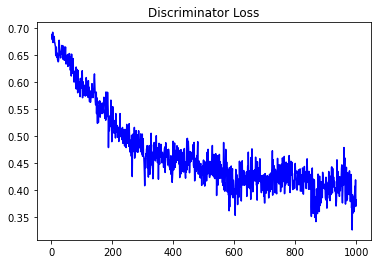

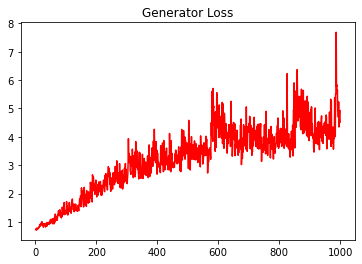

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.26029301409739725


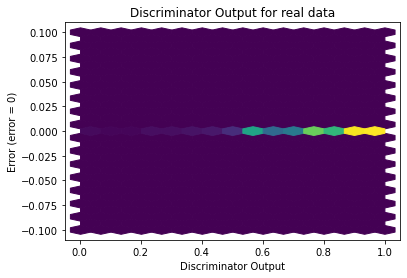

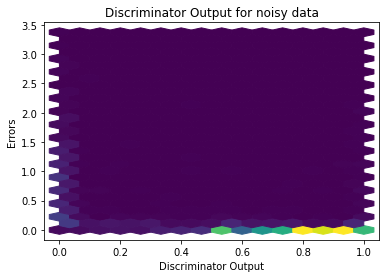

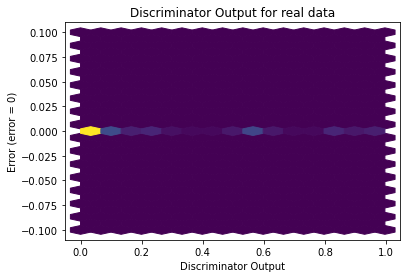

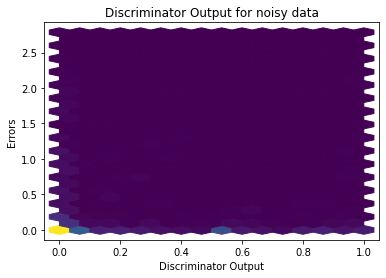

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())